<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to the Regression with Neural Networks in TensorFlow
There are many definations for a regression problem but in pur cases, we're going to simplfy it: predicting a numerical variables based on some other cobination of variable, even shorter.....predicting a number

In [46]:
import tensorflow as tf
print(tf.__version__)

2.18.0


##Creating some data to view and fit

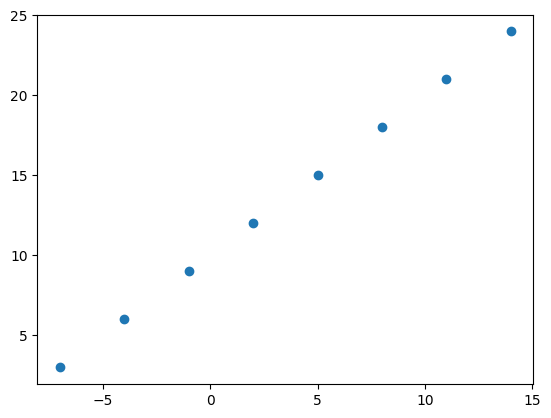

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#creating features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0, 8.0, 11.0, 14.0])
#creating labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#visulaize it
plt.scatter(x,y)


In [3]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [4]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([9397000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9397000], dtype=int32)>)

In [5]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

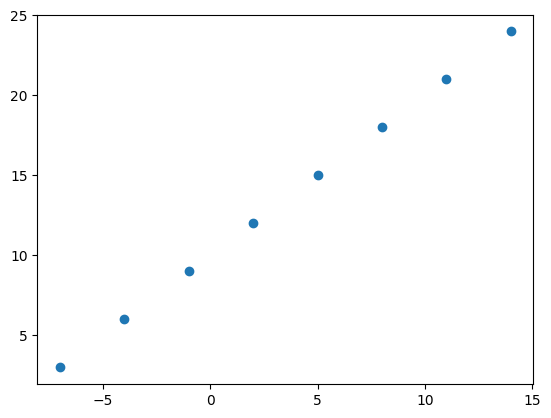

In [8]:
plt.scatter(x,y)

In [9]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

##Steps in Modeling TensorFlow
1.**Creating a Model**: define the input & ouput layers, as well as the hidden layres of a deep learning model.

2.**Compiling a model**: define the loss function(in other words, the function which tells our model how wrong it is)and the optimizer( tells our model how to improve the patterns its learning) and evaluation metrics
(What we can use to interpret the performance of our model).

3.**Fitting a model**: letting the model try to find patterns between x & y(features and labels)

In [10]:
#set ramdom seed
tf.random.set_seed(42)

#1.Create  a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9.0067 - mae: 9.0067
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 8.8742 - mae: 8.8742
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 8.7417 - mae: 8.7417
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 8.6092 - mae: 8.6092
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 8.4767 - mae: 8.4767


In [11]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


array([[24.849401]], dtype=float32)

##Improving Model
We can inprove the model by altering the steps we took to create a mode.

1.**Creating a mode**: here we might add more layres, increaes the number of hidden unite(all called neurons) within each of the hidden layers, change the activation function of each layer

2.**Compiling a model**:Here we might change the optimizatioin function or perhaps the learning rate of optimization functon.

3**Fitting**: here we might fit the model for more epochs(leave it training for longer) or on more data(given the model more examples to learn from)

###Using SSD()

In [12]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.7651 - mae: 13.7651
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.1725 - mae: 13.1725
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.6075 - mae: 12.6075
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.0381 - mae: 12.0381
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.4169 - mae: 11.4169
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 10.6965 - mae: 10.6965
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 9.8425 - mae: 9.8425
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 8.7851 - mae: 8.7851
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 7.4059 - mae: 7.4059
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 5.5661 - mae: 5.5661
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 4.1952 - mae: 4.1952
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 4.1342 - mae: 4.1342
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [13]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred, y_pred+10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


(array([[30.449617]], dtype=float32), array([[40.449615]], dtype=float32))

###Using Adam(Adam(learning_rate=0.0001)

In [14]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.5093 - mae: 13.5093
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 13.4805 - mae: 13.4805
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 13.4521 - mae: 13.4521
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 13.4231 - mae: 13.4231
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 13.3940 - mae: 13.3940
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 13.3669 - mae: 13.3669
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 13.3395 - mae: 13.3395
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 13.3108 - mae: 13.3108
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 13.2816 - mae: 13.2816
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 13.2523 - mae: 13.2523
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 13.2226 - mae: 13.2226
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 13.1922 - mae: 13.1922
Epoch 13/100
1/1 ━━━

In [15]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


array([[32.059025]], dtype=float32)

In [16]:
y_pred+10

array([[42.059025]], dtype=float32)

In [17]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

###Let's see if we can make another to improve our model

In [18]:
#1. Create tthe model(this time eith an extra hidden layers with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step - loss: 11.1743 - mae: 11.1743
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 10.6121 - mae: 10.6121
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 10.0285 - mae: 10.0285
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 9.4167 - mae: 9.4167
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 8.7708 - mae: 8.7708
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 8.1073 - mae: 8.1073
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 7.4483 - mae: 7.4483
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 6.7440 - mae: 6.7440
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 5.9919 - mae: 5.9919
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 5.1739 - mae: 5.1739
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 4.2868 - mae: 4.2868
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 3.9457 - mae: 3.9457
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [19]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [20]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[32.570045]], dtype=float32)

###48. Evaluating a TensorFlow model part 1 ("visualise, visualise, visualise")

#Evaluating a model
In pratice, a typical workflow you'll go through when building neural networks is:
```
Build a model->fit it -> evaluate it-> tweek model -> fit it -> evaluate it -> tweek a model -> fit it -> evaluate it...



When it somes to evaluating.. there are 3 words you should memorize:
>"Visualize, visualize, visualize"

It's a good idea to visualize:

*The data- what data are we woeking with? What does it looks like?

*The model itself- what does our model look like?

*The training of a model- how does a model perform while it learning?

*The predictions of a model- how do the prediction of a model line up aagainst the ground truth(the original labels)


In [21]:
#Make a big dataset
x=tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
#make labels for the dataset
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

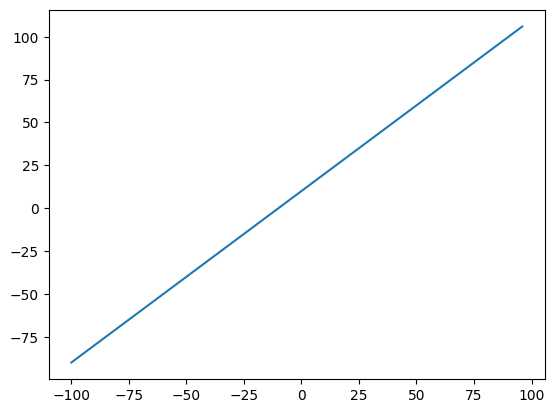

In [23]:
#visualize the data
import matplotlib.pyplot as plt
plt.plot(x,y)

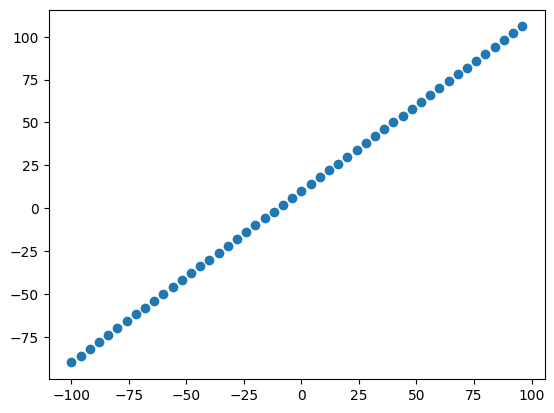

In [24]:
plt.scatter(x,y)

###The 3 set...
***Training set*** -the model learns from the  data, which is typicallly 70-80% of the total data you have available.

***Validation set*** - the model gets turned on this data, which is typically 10-15% of the data available.

***Test set*** - The model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data vailabe


In [25]:
x_train=np.array(x[:40])# first 40 are training samples(80% of the total data)
y_train=np.array(y[:40])

x_test=x[40:]# last 10 are testing samples(20% of the total data)
y_test=y[40:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#Visualising the data
Now we have got pur data in tarining and test sets... let's visulaize it again!

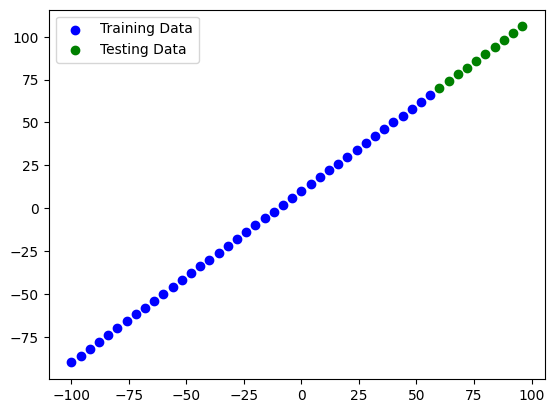

In [26]:
# plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training Data")

#plot testing data in green
plt.scatter(x_test, y_test, c="g", label="Testing Data")

#showing the legends
plt.legend();


In [27]:
#lets create a model which builds autoatically by defining the input_shape agguments

tf.random.set_seed(42)

#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"), # 1 denotes the no. of the parameter(optional you can choose multiple no. of params)
    tf.keras.layers.Dense(1, name="output_layes")
], name="mode_1")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "mode_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layes (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
#3.Fit a model
model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 19.4472 - mae: 19.4472 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 20.3273 - mae: 20.3273
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 20.8512 - mae: 20.8512
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 18.7075 - mae: 18.7075 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.3094 - mae: 12.3094 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.0798 - mae: 15.0798
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15.6463 - mae: 15.6463
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.3269 - mae: 11.3269
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.1790 - mae: 15.1790
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.1446 - mae: 11.1446
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.9949 - mae: 14.9949
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.0711 - mae: 11.0711
Epoch 13/100
2/2 ━━━━━

In [30]:
#get a summaru of a model
model.summary()

Model: "mode_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layes (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

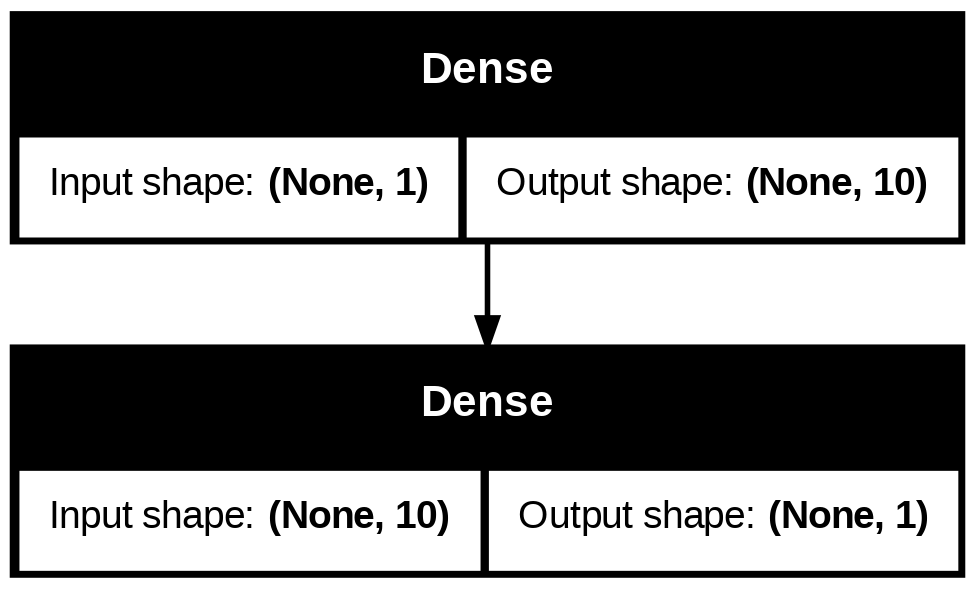

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

###Visualize our model's Predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test oy y_true versus y_pred(ground truth versus you model's predictios)

In [32]:
#3.Fit a model
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=100, verbose=0)

In [33]:
#Make some predictions
y_pred=model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[37.38372 ],
       [39.680653],
       [41.97757 ],
       [44.2745  ],
       [46.571426],
       [48.86836 ],
       [51.165283],
       [53.462208],
       [55.75914 ],
       [58.056065]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
#let's create a plotting functions
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))
#plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

#plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

#plot the predictions in red
  plt.scatter(test_data,  predictions, c="r", label=" Predictions")
#dhow the legends
  plt.legend()

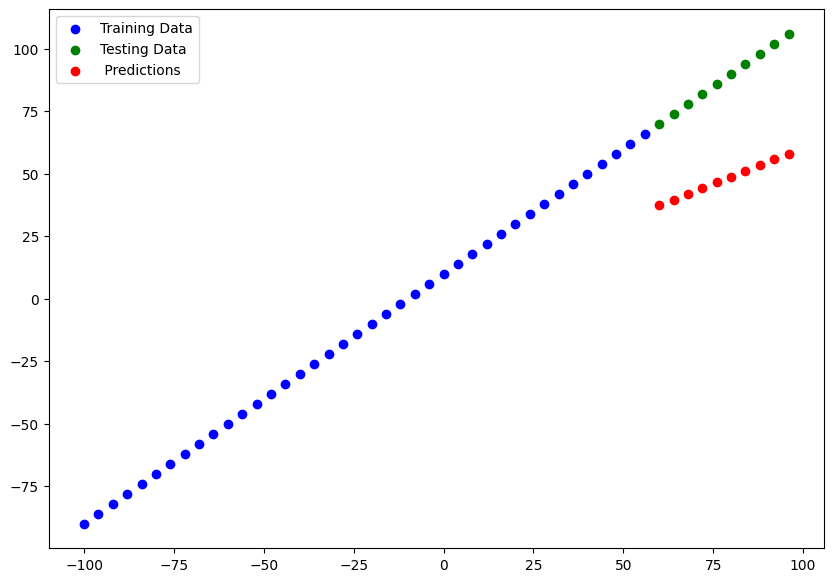

In [36]:
plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred)

###Evaluating our Model's prediction with a regreassion evaluation atrics

Depending upon the problem you are working on, there will be different evaluation metrices to evaluate your

Since we're working on a regressioin, two of the main metrices:

*MAE: mean absolute error, "on average, how wrong is each of my model's prediction"

*MSE: mean Square error, "square the average errors"

In [39]:
#Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 40.2801 - mae: 40.2801


[40.28010940551758, 40.28010940551758]

In [52]:
#calculate the mean absloute error
mae=tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=40.28010940551758>

In [53]:
#calculate the mean square error
mse=tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1646.415771484375>

#Making the MSE function and MAE function



In [80]:
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true, tf.squeeze(y_pred)) #squeeze removes the 1-D

In [79]:
def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true, tf.squeeze(y_pred)) #squeeze removes the 1-D

<tf.Tensor: shape=(), dtype=float32, numpy=1646.415771484375>

#Condicting experiment to improve our model

(so thar red line and green line touches to each other)

```Build a model->fit it -> evaluate it-> tweek model -> fit it -> evaluate it -> tweek a model -> fit it -> evaluate it...```

1. Get more data- get ore example for your model to train on(more opportunities to learn patterns or relationship between features and labels)

2. Make your model larger(using a more complex model )- this might come in the form of more layers or more hidden units in each layers

3. Train for longer -give your model more of a chance to find the patterns between the data

Let's do 3 modelling experiments:

1. `model_1`  same as the original model, 1 layer, trained for 100 epochs

2. `model_2` -2 layers, trained for 100 epochs

3. `model_2` -2 layers, trained for 500 epochs

`Build model_1`

In [111]:
#Set the random seed
tf.random.set_seed(42)
#1. Create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3.Fit a model
model_1.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.5881 - mae: 11.5881 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.5651 - mae: 8.5651
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.0338 - mae: 10.0338
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7337 - mae: 11.7337
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.6748 - mae: 8.6748
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.1436 - mae: 10.1436
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.8793 - mae: 11.8793
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.7846 - mae: 8.7846
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.2533 - mae: 10.2533
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.0479 - mae: 12.0479
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.5383 - mae: 12.5383
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.9627 - mae: 7.9627
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


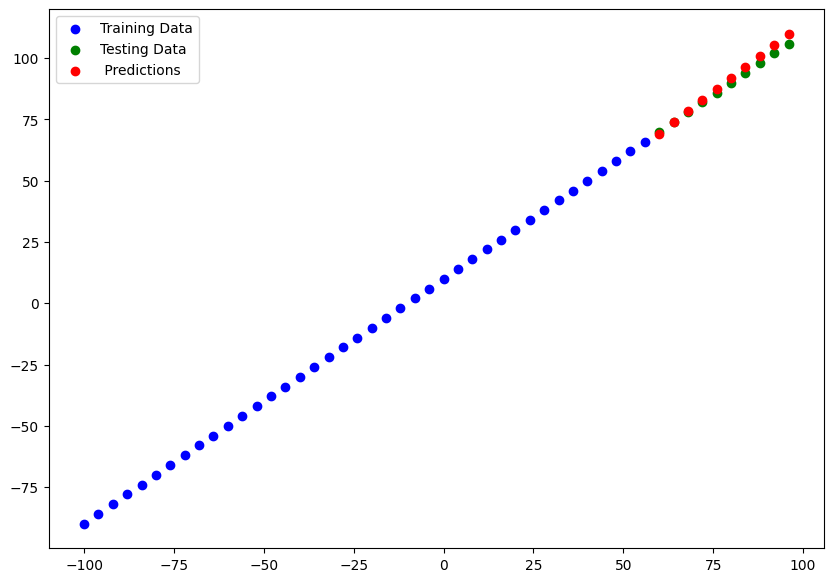

In [112]:
#make and plot predictioin for model_1
y_preds_1=model_1.predict(x_test)
y_preds_1
plot_predictions(predictions=y_preds_1)

In [78]:
tf.squeeze(y_preds_1), y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.23139 ,  73.75265 ,  78.2739  ,  82.795166,  87.31643 ,
         91.837685,  96.35894 , 100.8802  , 105.40147 , 109.92272 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [82]:
mae_1=mae(y_test, tf.squeeze(y_preds_1))
mse_1=mse(y_test, tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.780247449874878>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.7287211418151855>)

`Build model_2`

* 2 dense layers , trained for the 100 epochs

In [113]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_1.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.8227 - mae: 10.8227
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.7686 - mae: 7.7686
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.2374 - mae: 9.2374
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.9885 - mae: 10.9885
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9050 - mae: 11.9050
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.1603 - mae: 7.1603
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.8668 - mae: 7.8668
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.8702 - mae: 6.8702
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.5760 - mae: 8.5760
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.8523 - mae: 6.8523
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.6452 - mae: 8.6452
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.6809 - mae: 6.6809
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


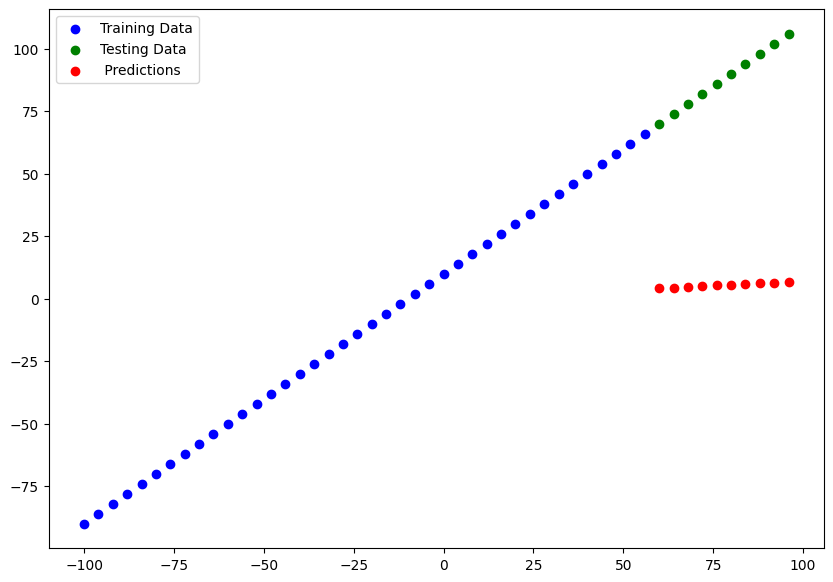

In [114]:
#make and plot predictioin for model_1
y_preds_2=model_2.predict(x_test)
# y_preds_2
plot_predictions(predictions=y_preds_2)

In [115]:
mae_2=mae(y_test, tf.squeeze(y_preds_2))
mse_2=mse(y_test, tf.squeeze(y_preds_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=82.5250015258789>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6924.4951171875>)

```Build mode_3```

In [128]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=500, verbose=1)
# model_1.fit(tf.expand(x_train, axis=1), y_train, epochs=100, verbose=1)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 47.8422 - mae: 47.8422 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 35.4231 - mae: 35.4231
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 24.2079 - mae: 24.2079
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 23.8070 - mae: 23.8070 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 15.5505 - mae: 15.5505 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 18.9240 - mae: 18.9240
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 13.3777 - mae: 13.3777
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 15.3616 - mae: 15.3616 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 11.0625 - mae: 11.0625
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 14.8649 - mae: 14.8649
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15.8384 - mae: 15.8384
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.0084 - mae: 12.0084
Epoch 13/500
2/2 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


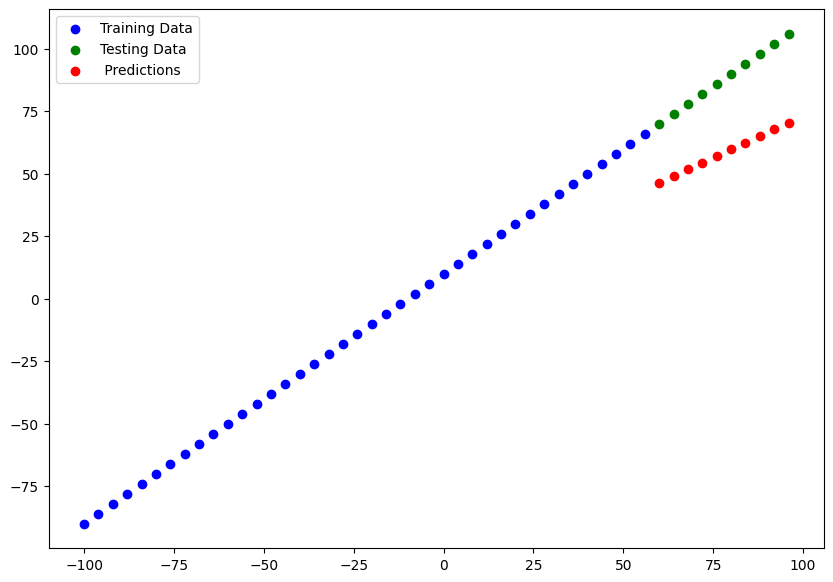

In [129]:
y_preds_3=model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)